<a href="https://colab.research.google.com/github/vyshnavinellore/2216129_AIML_BootCamp/blob/main/Logistic_Rregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/sample_data/SUV_Purchase.csv")
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


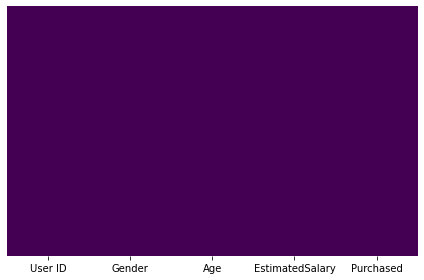

In [ ]:
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()
get_heatmap(df)

In [ ]:
#Data Preprocessing

from sklearn import preprocessing

#Label Encoding
LE= preprocessing.LabelEncoder()

# Fitting it to our dataset

df.Gender = LE.fit_transform(df.Gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
df = df.drop('User ID',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


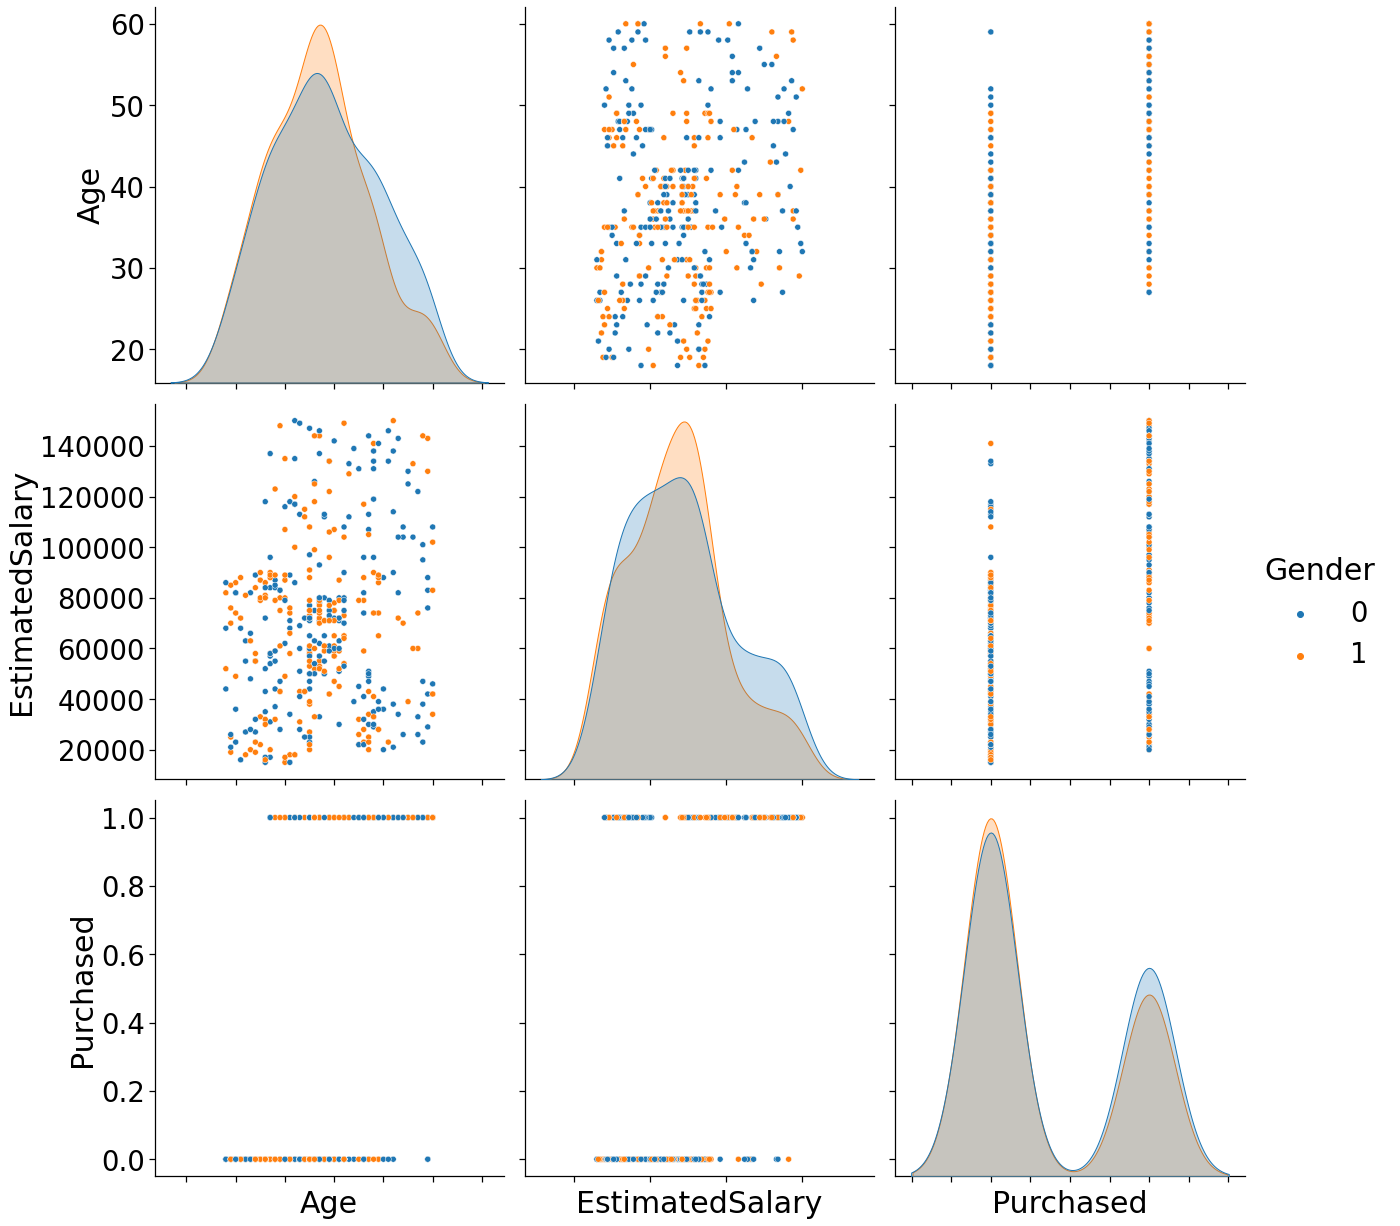

In [ ]:
#understanding the Distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
  g=sns.pairplot(df[['Gender','Age','EstimatedSalary','Purchased']],hue='Gender',palette='tab10',size=6)
g.set(xticklabels=[]);

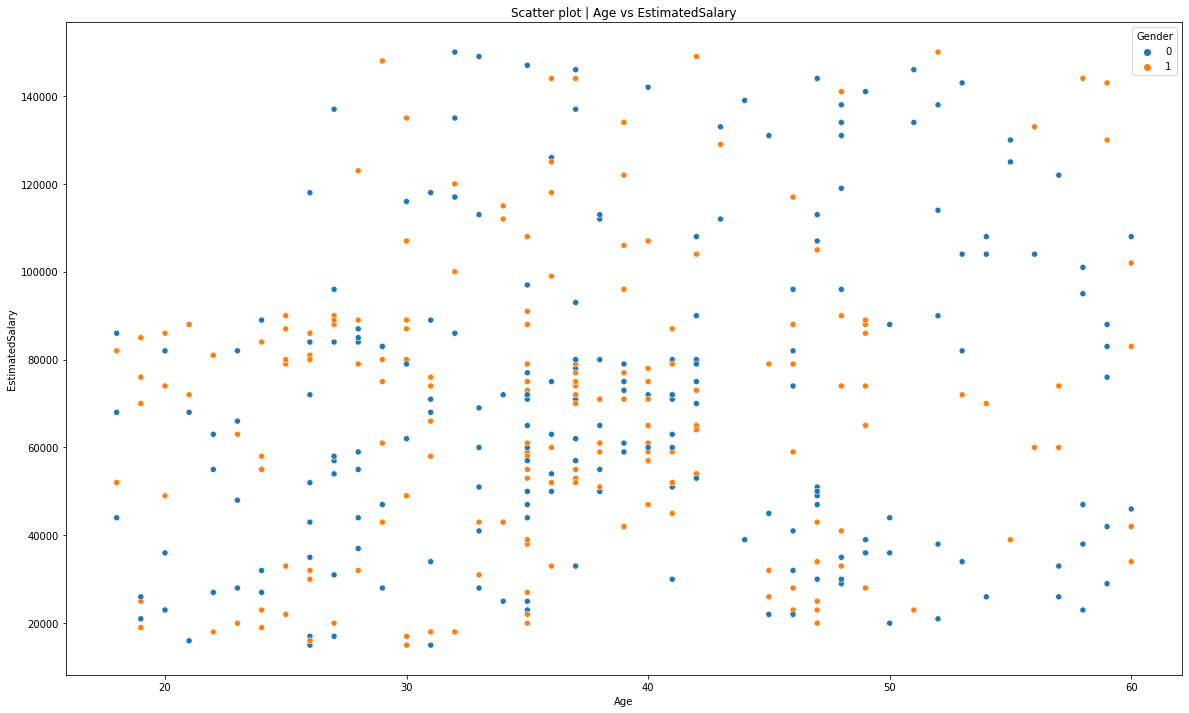

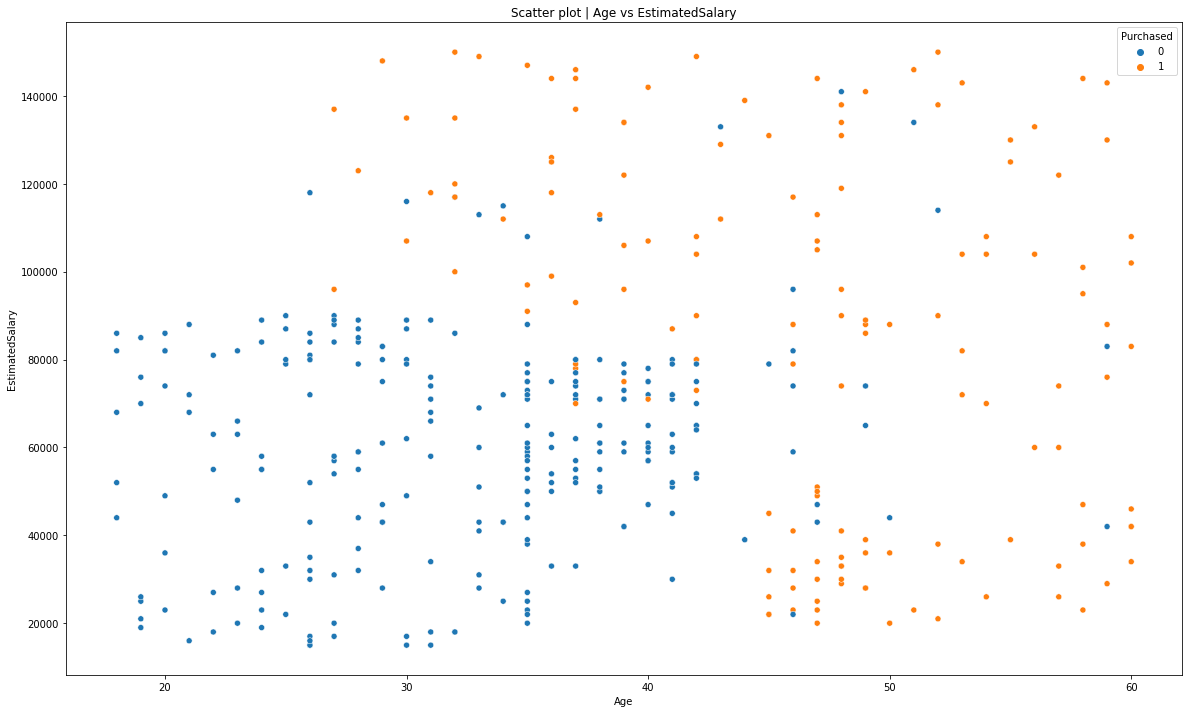

In [ ]:
WIDTH  = 20
HEIGHT = 6

def plot_vs(frame, col1, col2, hue):
    plt.figure(figsize=(WIDTH, HEIGHT * 2))
    sns.scatterplot(data=frame, x=col1, y=col2, hue=hue)
    plt.title(f"Scatter plot | {col1} vs {col2}")
    plt.show()
plot_vs(df,'Age', 'EstimatedSalary', 'Gender')
plot_vs( df,'Age', 'EstimatedSalary', 'Purchased')

In [ ]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

In [ ]:
data_scaled.head()

,0,1,2
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


In [ ]:
# EstimatedSalary : Outliers handling
df = df.drop(df.query("EstimatedSalary > 120000 and Purchased == 0").index)# Age : Outliers handling

df= df.drop(df.query("Age > 55 and Purchased == 0").index)

In [ ]:
data_scaled.columns=['Gender','Age','EstimatedSalary']

In [ ]:
data_scaled.head()

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


In [ ]:
data_scaled['Purchased'] = df.Purchased

In [ ]:
data_scaled

,Gender,Age,EstimatedSalary,Purchased
0,1.020204,-1.781797,-1.490046,0.0
1,1.020204,-0.253587,-1.460681,0.0
2,-0.980196,-1.113206,-0.785290,0.0
3,-0.980196,-1.017692,-0.374182,0.0
4,1.020204,-1.781797,0.183751,0.0
...,...,...,...,...
395,-0.980196,0.797057,-0.844019,1.0
396,1.020204,1.274623,-1.372587,1.0
397,-0.980196,1.179110,-1.460681,1.0
398,1.020204,-0.158074,-1.078938,0.0


In [ ]:
data_scaled = data_scaled[data_scaled['Purchased'].notna()]

In [ ]:
df=data_scaled

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.020204,-1.781797,-1.490046,0.0
1,1.020204,-0.253587,-1.460681,0.0
2,-0.980196,-1.113206,-0.785290,0.0
3,-0.980196,-1.017692,-0.374182,0.0
4,1.020204,-1.781797,0.183751,0.0


In [ ]:
from matplotlib.axis import YTick

#method 2 to load the data in the form of arrays -by library numpy

import numpy as np

x=np.array(df[['Gender','EstimatedSalary','Age']])

y=np.array(df[['Purchased']])

In [ ]:
x

array([[ 1.02, -1.49, -1.78],
       [ 1.02, -1.46, -0.25],
       [-0.98, -0.79, -1.11],
       ...,
       [-0.98, -1.46,  1.18],
       [ 1.02, -1.08, -0.16],
       [-0.98, -0.99,  1.08]])

In [ ]:
#spliting the data  into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
x_train

array([[ 1.02, -0.34, -1.3 ],
       [-0.98, -0.43, -1.3 ],
       [ 1.02,  0.21,  0.13],
       [ 1.02,  0.62, -0.25],
       [ 1.02,  0.39,  2.13],
       [ 1.02,  1.77,  2.04],
       [-0.98,  1.8 ,  0.99],
       [ 1.02, -0.46,  0.42],
       [-0.98, -0.64, -1.4 ],
       [ 1.02, -1.08, -1.21],
       [ 1.02, -0.79, -0.83],
       [ 1.02, -0.32, -0.25],
       [ 1.02,  0.27, -0.25],
       [-0.98, -0.93,  1.94],
       [ 1.02, -1.23,  1.08],
       [ 1.02, -0.32,  0.03],
       [ 1.02,  1.48, -0.54],
       [-0.98,  1.53,  1.85],
       [-0.98, -1.61, -0.64],
       [-0.98,  1.01,  1.56],
       [ 1.02, -0.61, -1.69],
       [ 1.02, -0.26,  0.03],
       [ 1.02,  0.15, -0.25],
       [-0.98, -0.26,  0.13],
       [-0.98,  1.89,  0.99],
       [ 1.02,  0.33, -1.5 ],
       [-0.98,  1.39, -0.54],
       [-0.98, -0.61,  0.89],
       [ 1.02,  1.33, -0.35],
       [-0.98,  1.3 ,  1.37],
       [-0.98,  0.07, -0.35],
       [-0.98,  0.57, -0.64],
       [-0.98,  0.27,  0.42],
       [-0

In [ ]:
'''from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)'''

'from sklearn.preprocessing import StandardScaler\n\nsc = StandardScaler()\n\nx_train = sc.fit_transform(x_train)\nx_test=sc.transform(x_test)'

In [ ]:
x_train

array([[ 1.02, -0.34, -1.3 ],
       [-0.98, -0.43, -1.3 ],
       [ 1.02,  0.21,  0.13],
       [ 1.02,  0.62, -0.25],
       [ 1.02,  0.39,  2.13],
       [ 1.02,  1.77,  2.04],
       [-0.98,  1.8 ,  0.99],
       [ 1.02, -0.46,  0.42],
       [-0.98, -0.64, -1.4 ],
       [ 1.02, -1.08, -1.21],
       [ 1.02, -0.79, -0.83],
       [ 1.02, -0.32, -0.25],
       [ 1.02,  0.27, -0.25],
       [-0.98, -0.93,  1.94],
       [ 1.02, -1.23,  1.08],
       [ 1.02, -0.32,  0.03],
       [ 1.02,  1.48, -0.54],
       [-0.98,  1.53,  1.85],
       [-0.98, -1.61, -0.64],
       [-0.98,  1.01,  1.56],
       [ 1.02, -0.61, -1.69],
       [ 1.02, -0.26,  0.03],
       [ 1.02,  0.15, -0.25],
       [-0.98, -0.26,  0.13],
       [-0.98,  1.89,  0.99],
       [ 1.02,  0.33, -1.5 ],
       [-0.98,  1.39, -0.54],
       [-0.98, -0.61,  0.89],
       [ 1.02,  1.33, -0.35],
       [-0.98,  1.3 ,  1.37],
       [-0.98,  0.07, -0.35],
       [-0.98,  0.57, -0.64],
       [-0.98,  0.27,  0.42],
       [-0

In [ ]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]]


In [ ]:
print("predicted value for training data",model.score(x_train,y_train))
print("predicted value for testing data",model.score(x_test,y_test))

predicted value for training data 0.8544303797468354
predicted value for testing data 0.8860759493670886


In [ ]:
accuracy=model.score(x,y)*100
print(accuracy)

86.07594936708861


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)

accuracy_score(y_test, y_pred)

[[48  6]
 [ 3 22]]


0.8860759493670886

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: ignored